In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

## Підготовка даних

In [2]:
df = pd.read_csv('data.csv', index_col = 0, parse_dates=True)

In [3]:
df.head()

,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SHV,SPY,TIP
Date,,,,,,,,,,,,
2010-01-04,24.081059,24.376337,32.429024,37.994488,40.281586,67.646042,28.448309,38.480568,23.598110,99.085266,87.483185,74.189728
2010-01-05,24.195150,24.405312,32.664406,38.027969,40.472691,67.943153,28.516615,38.893009,23.658329,99.049286,87.714760,74.431847
2010-01-06,24.152895,24.839912,32.732731,38.188713,40.577354,67.668953,28.504200,39.099220,23.701344,99.058319,87.776535,74.239586
2010-01-07,24.013456,24.530863,32.542919,38.041359,40.741142,67.668953,28.758810,39.305447,23.641125,99.058319,88.147041,74.353531
2010-01-08,24.152895,24.511547,32.801079,38.342751,40.804825,67.752731,28.566290,39.429176,23.701344,99.094284,88.440407,74.510231


In [4]:
df.tail(1)

,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SHV,SPY,TIP
Date,,,,,,,,,,,,
2023-09-29,21.209,24.959999,37.950001,68.919998,73.335007,91.350998,78.139999,51.669998,30.030001,110.005005,427.480011,103.549004


In [5]:
price = df.resample('M').last()

In [6]:
# прибуток та надлишковий прибуток
ret = price.pct_change().dropna()

ex_ret = ret.subtract(ret['SHV'], axis = 0).drop(columns = ['SHV'])

In [7]:
display(ret.head())
display(ex_ret.head())

,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SHV,SPY,TIP
Date,,,,,,,,,,,,
2010-02-28,0.002418,0.041428,0.017764,0.002668,0.018734,0.003318,0.054570,0.021158,-0.000375,0.000018,0.031195,-0.013032
2010-03-31,-0.000179,-0.004655,0.081109,0.063854,0.021335,-0.010569,0.097485,0.079608,0.019108,-0.000109,0.060880,-0.000058
2010-04-30,-0.014475,0.039116,-0.001662,-0.028046,0.019245,0.016527,0.063881,0.018182,-0.001838,-0.000063,0.015470,0.025150
2010-05-31,-0.036446,-0.101473,-0.093936,-0.111928,-0.046755,0.029332,-0.056835,-0.128968,-0.041621,0.000145,-0.079455,0.001917
2010-06-30,0.011479,-0.017760,-0.013987,-0.020619,0.011111,0.030482,-0.046701,-0.059091,0.014988,0.000326,-0.051741,0.012799


,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SPY,TIP
Date,,,,,,,,,,,
2010-02-28,0.002400,0.041410,0.017745,0.002649,0.018716,0.003300,0.054552,0.021139,-0.000393,0.031177,-0.013050
2010-03-31,-0.000071,-0.004547,0.081217,0.063963,0.021443,-0.010460,0.097593,0.079716,0.019217,0.060988,0.000051
2010-04-30,-0.014411,0.039179,-0.001599,-0.027983,0.019309,0.016590,0.063944,0.018245,-0.001775,0.015533,0.025213
2010-05-31,-0.036591,-0.101618,-0.094081,-0.112073,-0.046900,0.029187,-0.056980,-0.129113,-0.041765,-0.079600,0.001772
2010-06-30,0.011153,-0.018086,-0.014313,-0.020946,0.010785,0.030156,-0.047027,-0.059418,0.014662,-0.052067,0.012472


## 1. Завдання

In [8]:
# середні значення та волатильність надлишкової прибутковості кожного актива
stats = ex_ret.describe().iloc[[1,2]]
stats

,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SPY,TIP
mean,-0.001018,0.001447,0.002435,0.004553,0.003445,0.001231,0.007048,0.003462,0.001104,0.010313,0.001431
std,0.023823,0.050596,0.053879,0.046489,0.022958,0.017973,0.048549,0.063468,0.014550,0.042572,0.014865


## 2.
Найкращі - найбільші коефіцієнти

In [9]:
sharp_coef = ((ret.mean()-ret['SHV'].mean())/ret.std()).to_frame(name='sharp_coef')
sharp_coef.drop(index=['SHV'], inplace = True)

In [10]:
sharp_coef.sort_values('sharp_coef', ascending = False)

,sharp_coef
SPY,0.242833
HYG,0.150513
IYR,0.145625
EFA,0.098020
TIP,0.096258
QAI,0.075825
IEF,0.067986
PSP,0.054629
EEM,0.045214
DBC,0.028665


## 3.
Кореляційна матриця

In [11]:
ex_ret.corr()

,BWX,DBC,EEM,EFA,HYG,IEF,IYR,PSP,QAI,SPY,TIP
BWX,1.000000,0.319567,0.651252,0.617985,0.620627,0.461662,0.514231,0.531838,0.661634,0.464959,0.620048
DBC,0.319567,1.000000,0.562727,0.581268,0.538150,-0.320810,0.374016,0.543791,0.539360,0.515251,0.116236
EEM,0.651252,0.562727,1.000000,0.840531,0.712053,-0.056787,0.606334,0.769011,0.798432,0.721475,0.334126
EFA,0.617985,0.581268,0.840531,1.000000,0.797060,-0.094344,0.701762,0.903023,0.857032,0.869079,0.316209
HYG,0.620627,0.538150,0.712053,0.797060,1.000000,0.084760,0.740600,0.818983,0.809571,0.798918,0.484417
IEF,0.461662,-0.320810,-0.056787,-0.094344,0.084760,1.000000,0.174238,-0.095559,0.085758,-0.122458,0.716868
IYR,0.514231,0.374016,0.606334,0.701762,0.740600,0.174238,1.000000,0.749744,0.693190,0.768699,0.527281
PSP,0.531838,0.543791,0.769011,0.903023,0.818983,-0.095559,0.749744,1.000000,0.855648,0.900905,0.368704
QAI,0.661634,0.539360,0.798432,0.857032,0.809571,0.085758,0.693190,0.855648,1.000000,0.840656,0.476953
SPY,0.464959,0.515251,0.721475,0.869079,0.798918,-0.122458,0.768699,0.900905,0.840656,1.000000,0.327222


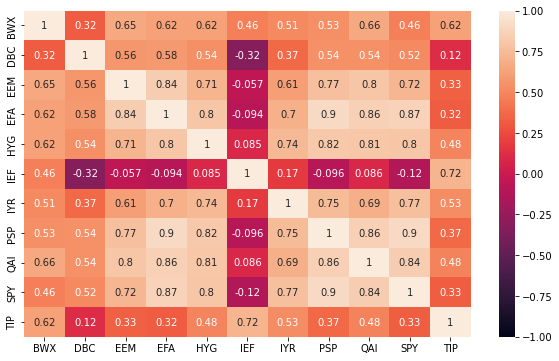

In [12]:
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(ex_ret.corr(), vmin=-1, vmax=1, annot=True)

In [13]:
ex_ret.corr().abs().stack().drop_duplicates().sort_values(ascending=False)

BWX  BWX    1.000000
EFA  PSP    0.903023
PSP  SPY    0.900905
EFA  SPY    0.869079
     QAI    0.857032
PSP  QAI    0.855648
QAI  SPY    0.840656
EEM  EFA    0.840531
HYG  PSP    0.818983
     QAI    0.809571
     SPY    0.798918
EEM  QAI    0.798432
EFA  HYG    0.797060
EEM  PSP    0.769011
IYR  SPY    0.768699
     PSP    0.749744
HYG  IYR    0.740600
EEM  SPY    0.721475
IEF  TIP    0.716868
EEM  HYG    0.712053
EFA  IYR    0.701762
IYR  QAI    0.693190
BWX  QAI    0.661634
     EEM    0.651252
     HYG    0.620627
     TIP    0.620048
     EFA    0.617985
EEM  IYR    0.606334
DBC  EFA    0.581268
     EEM    0.562727
     PSP    0.543791
     QAI    0.539360
     HYG    0.538150
BWX  PSP    0.531838
IYR  TIP    0.527281
DBC  SPY    0.515251
BWX  IYR    0.514231
HYG  TIP    0.484417
QAI  TIP    0.476953
BWX  SPY    0.464959
     IEF    0.461662
DBC  IYR    0.374016
PSP  TIP    0.368704
EEM  TIP    0.334126
SPY  TIP    0.327222
DBC  IEF    0.320810
BWX  DBC    0.319567
EFA  TIP    0

***
Найкраще між собою корелюють - EFA та PSP - 0.903023\
Найменше між собою корелюють - EEM та IEF - 0.056787

## 4.


In [14]:
# "IEF" - внутрішні
# "HYG" - іноземні
ticks_to_compare = ['TIP', 'IEF', 'HYG']

print('MEAN:')
display(ex_ret[ticks_to_compare].mean())

print('SHARP:')
display(sharp_coef.loc[ticks_to_compare])

MEAN:


TIP    0.001431
IEF    0.001231
HYG    0.003445
dtype: float64

SHARP:


,sharp_coef
TIP,0.096258
IEF,0.067986
HYG,0.150513


***
Середнє та коеф Шарпа для TIP є більшою за IEF, проте меншою за HYG

## 5.
Tangency portfolio

In [15]:
ret_no_shv = ret.drop(columns=['SHV'])

cov_ret = ret_no_shv.cov().values

mean_ret = ret_no_shv.mean().values

ones = np.ones((1, len(mean_ret)))

In [16]:
w_t = (1/(ones @ np.linalg.inv(cov_ret) @ mean_ret)) * np.linalg.inv(cov_ret) @ mean_ret

In [17]:
w_t

array([-0.83201035,  0.07306089,  0.07898521,  0.22344054,  0.51908847,
        1.03009929, -0.17679235, -0.69260113, -0.69197498,  1.2830283 ,
        0.1856761 ])

In [18]:
ret_no_shv.columns.values

array(['BWX', 'DBC', 'EEM', 'EFA', 'HYG', 'IEF', 'IYR', 'PSP', 'QAI',
       'SPY', 'TIP'], dtype=object)

## 6.

In [19]:
shv_mean = ret['SHV'].mean()

ex_ret_mean = mean_ret - shv_mean

expected_income = shv_mean + w_t.T @ ex_ret_mean
print('очікуваний прибуток: ', expected_income)

expected_ex_income = w_t.T @ ex_ret_mean
print('очікуваний надлишковий прибуток: ', expected_ex_income)

std_t = np.abs(expected_ex_income) / np.sqrt(ex_ret_mean.T @ np.linalg.inv(cov_ret) @ ex_ret_mean)
print('волантильність: ', std_t)

sharp_coef_t = np.sqrt(ex_ret_mean.T @ np.linalg.inv(cov_ret) @ ex_ret_mean)
print('коефіцієнт Шарпа: ', sharp_coef_t)

очікуваний прибуток:  0.014946554984132073
очікуваний надлишковий прибуток:  0.014309319190953846
волантильність:  0.02697721577191074
коефіцієнт Шарпа:  0.5304223872447585


## 7.

In [20]:
# w_t - вже є

w_v = (1/(ones @ np.linalg.inv(cov_ret) @ ones.T)) * np.linalg.inv(cov_ret) @ ex_ret_mean

delta = (0.015 - w_v.T @ ex_ret_mean)/((w_t.T - w_v.T) @ ex_ret_mean)

w_p = delta*w_t + (1-delta)*w_v
w_p

array([-0.87217231,  0.07658764,  0.08279552,  0.23422562,  0.54414639,
        1.07981931, -0.18532651, -0.7260345 , -0.72534258,  1.34495395,
        0.19464459])

In [21]:
expected_ex_income = w_p.T @ ex_ret_mean
print('очікуваний надлишковий прибуток: ', expected_ex_income)

std_p = np.sqrt(w_p.T @ cov_ret @ w_p)
print('волантильність: ', std_p)

sharp_coef_p = (expected_ex_income - shv_mean)/std_p
print('коефіцієнт Шарпа: ', sharp_coef_t)

очікуваний надлишковий прибуток:  0.015
волантильність:  0.02855379584504334
коефіцієнт Шарпа:  0.5304223872447585
